In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Walmart.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.shape

(6435, 8)

In [7]:
#The date is differentiated into day, Month and year for further analysis.
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.weekday
data['Week'] = data['Date'].dt.week
data['Month'] = data['Date'].dt.month
data['Year']  = data['Date'].dt.year
data.drop('Date',axis=1,inplace=True)
data.head()

/var/folders/zt/g_xn1zfd1xj4yl3b6yj7c1080000gn/T/ipykernel_1929/1629725981.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
/var/folders/zt/g_xn1zfd1xj4yl3b6yj7c1080000gn/T/ipykernel_1929/1629725981.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [8]:
#Lets check the shape of our DataFrame after we added Day, Month and Year
data.shape

(6435, 11)

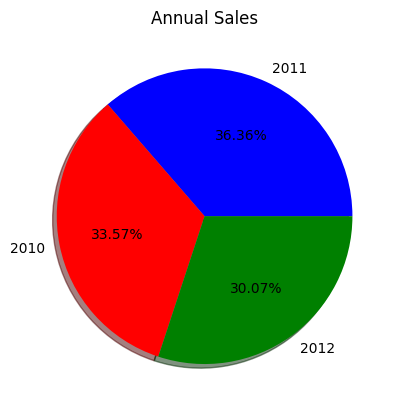

In [9]:
plt.pie(data['Year'].value_counts().values,labels =data['Year'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['blue','red',"green"])
plt.title('Annual Sales')
plt.show()

In [10]:
data2 = data.copy()
data2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [11]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
data2['Day'] = data2['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
data2['Month']= data2['Month'].map(months)
data2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,17,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,48,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,7,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,8,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,18,May,2010


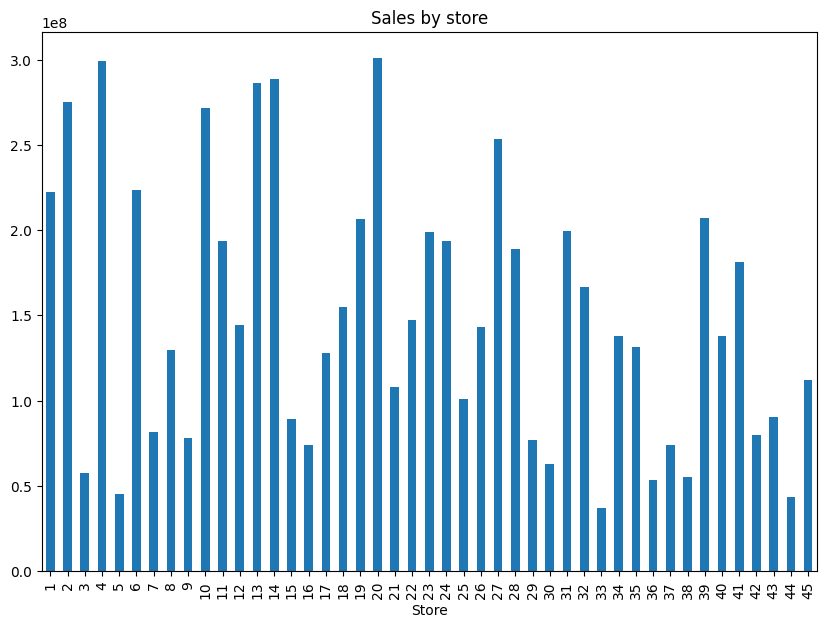

In [12]:
plt.figure(figsize=(10,7))

data2.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Sales by store')

plt.show()

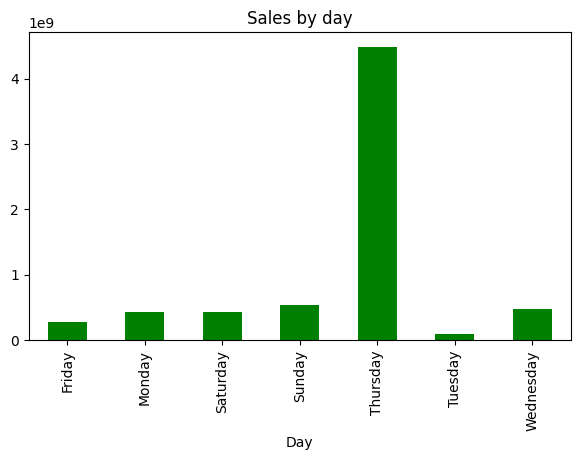

In [13]:
plt.figure(figsize=(7,4))

data2.groupby(['Day'])['Weekly_Sales'].sum().plot(kind='bar',color='Green')
plt.title('Sales by day')

plt.show()

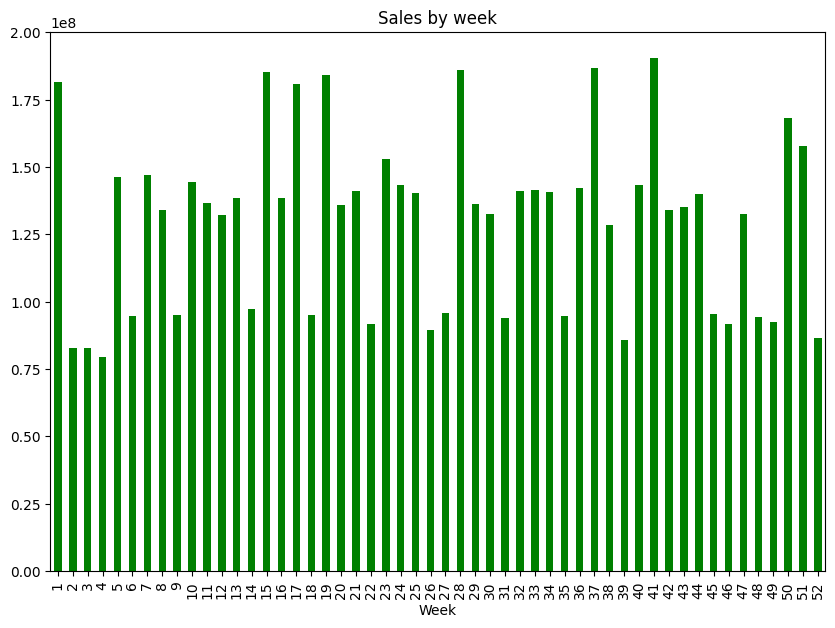

In [14]:
plt.figure(figsize=(10,7))

data2.groupby(['Week'])['Weekly_Sales'].sum().plot(kind='bar',color='Green')
plt.title('Sales by week')

plt.show()

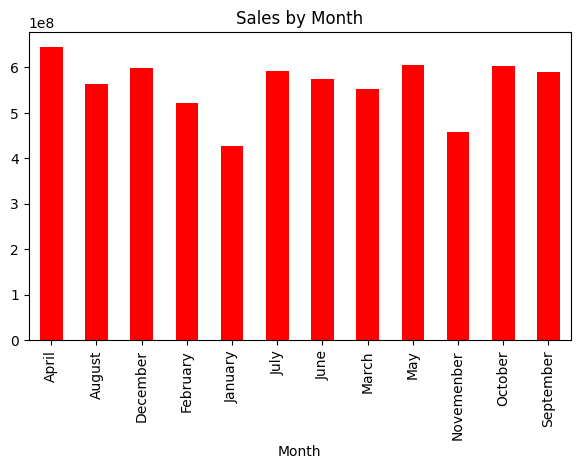

In [15]:
plt.figure(figsize=(7,4))

data2.groupby(['Month'])['Weekly_Sales'].sum().plot(kind='bar',color='red')
plt.title('Sales by Month')

plt.show()

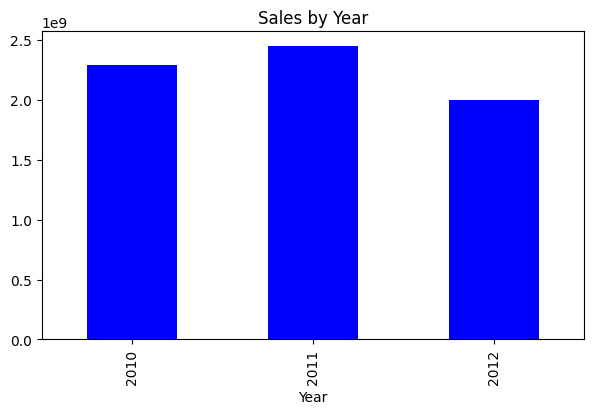

In [16]:
plt.figure(figsize=(7,4))

data2.groupby(['Year'])['Weekly_Sales'].sum().plot(kind='bar',color='blue')
plt.title('Sales by Year')

plt.show()

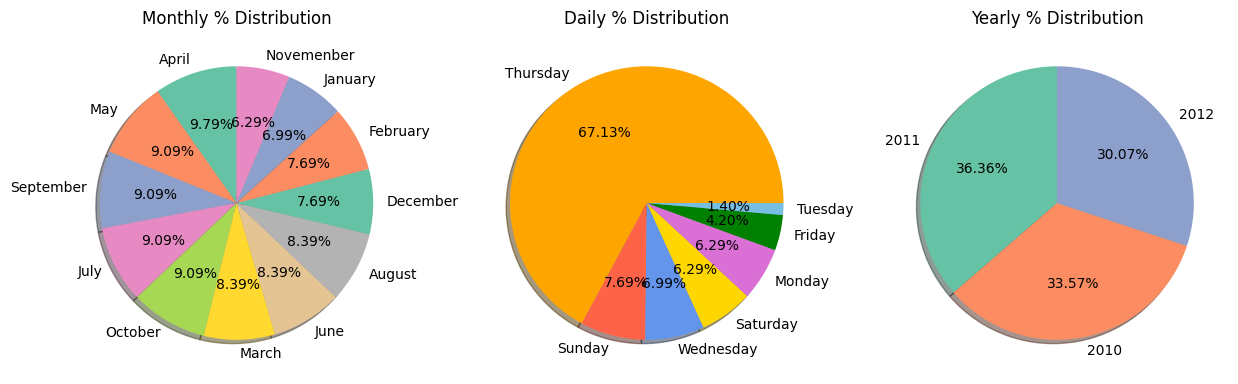

In [17]:
#Percentage distribution by Daily, Monthly and Yearly
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 2)
plt.pie(data2['Day'].value_counts().values, labels =data2['Day'].value_counts().index,
autopct = '%1.2f%%', shadow=True,colors=["Orange",'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',"#77BFE2"]) 
plt.title('Daily % Distribution')
plt.grid()

plt.subplot(1, 3, 1)
plt.pie(data2['Month'].value_counts().values, labels =data2['Month'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'))
plt.title('Monthly % Distribution')
plt.grid()

plt.subplot(1, 3, 3)
data3 = data2.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(data2['Year'].value_counts().values, labels =data2['Year'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'),labeldistance=1.1)  
plt.title('Yearly % Distribution')
plt.grid()


plt.show()

<Figure size 1500x1200 with 0 Axes>

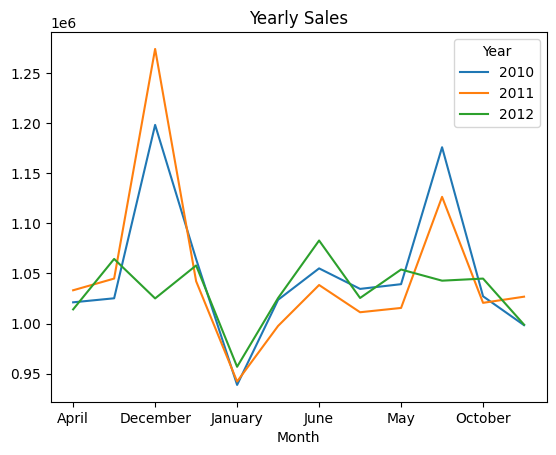

In [18]:
#Comparing monthly sales in years
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(data2, index = "Month", columns = "Year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

In [19]:
#Getting Minimum and Maximum store sales
print('Minimum Sales: ',data2.groupby('Store')['Weekly_Sales'].sum().min())
print('Maximum Sales: ',data2.groupby('Store')['Weekly_Sales'].sum().max())

Minimum Sales:  37160221.96
Maximum Sales:  301397792.46


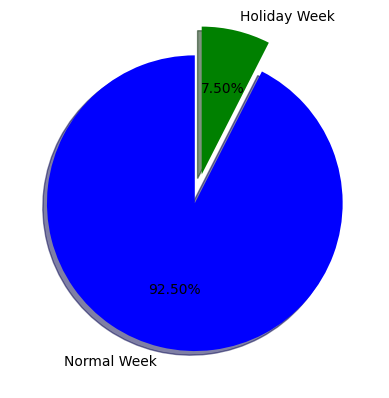

In [20]:
#Percentage distribution of a Holiday week and a Normal week
data3 = data2.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(data3['Weekly_Sales'],labels= ['Normal Week','Holiday Week'],
autopct='%1.2f%%',startangle=90,explode=[0,0.2],shadow=True,colors=['blue','green'])
plt.show()

In [21]:
holiday_week = data2[data2['Holiday_Flag']==1]
normal_week = data2[data2['Holiday_Flag']!=1]

{'whiskers': [<matplotlib.lines.Line2D at 0x13a7d1cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x13a7d33d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a7d1290>],
 'medians': [<matplotlib.lines.Line2D at 0x13a7bd190>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a7bf590>],
 'means': []}

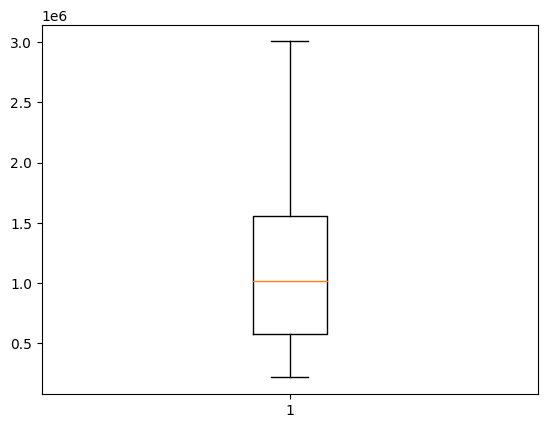

In [22]:
plt.boxplot(holiday_week['Weekly_Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13a8b8310>,
 'caps': [<matplotlib.lines.Line2D at 0x13a8b9950>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a8af650>],
 'medians': [<matplotlib.lines.Line2D at 0x13a8bae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a8bb8d0>],
 'means': []}

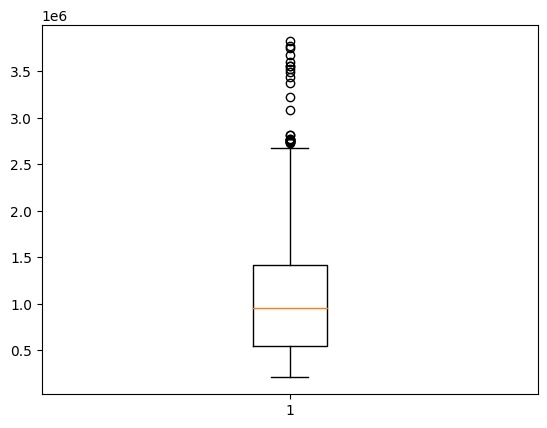

In [23]:
plt.boxplot(normal_week['Weekly_Sales'])

/var/folders/zt/g_xn1zfd1xj4yl3b6yj7c1080000gn/T/ipykernel_1929/1975059169.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")


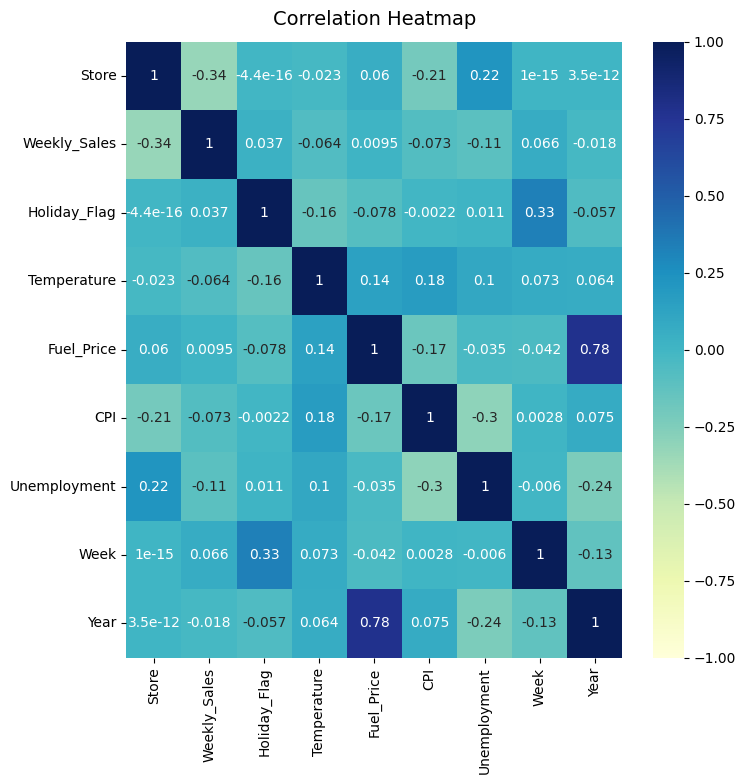

In [24]:
#Creating the heatmap to check for the data correlations
fig, ax = plt.subplots(figsize=(8,8))
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

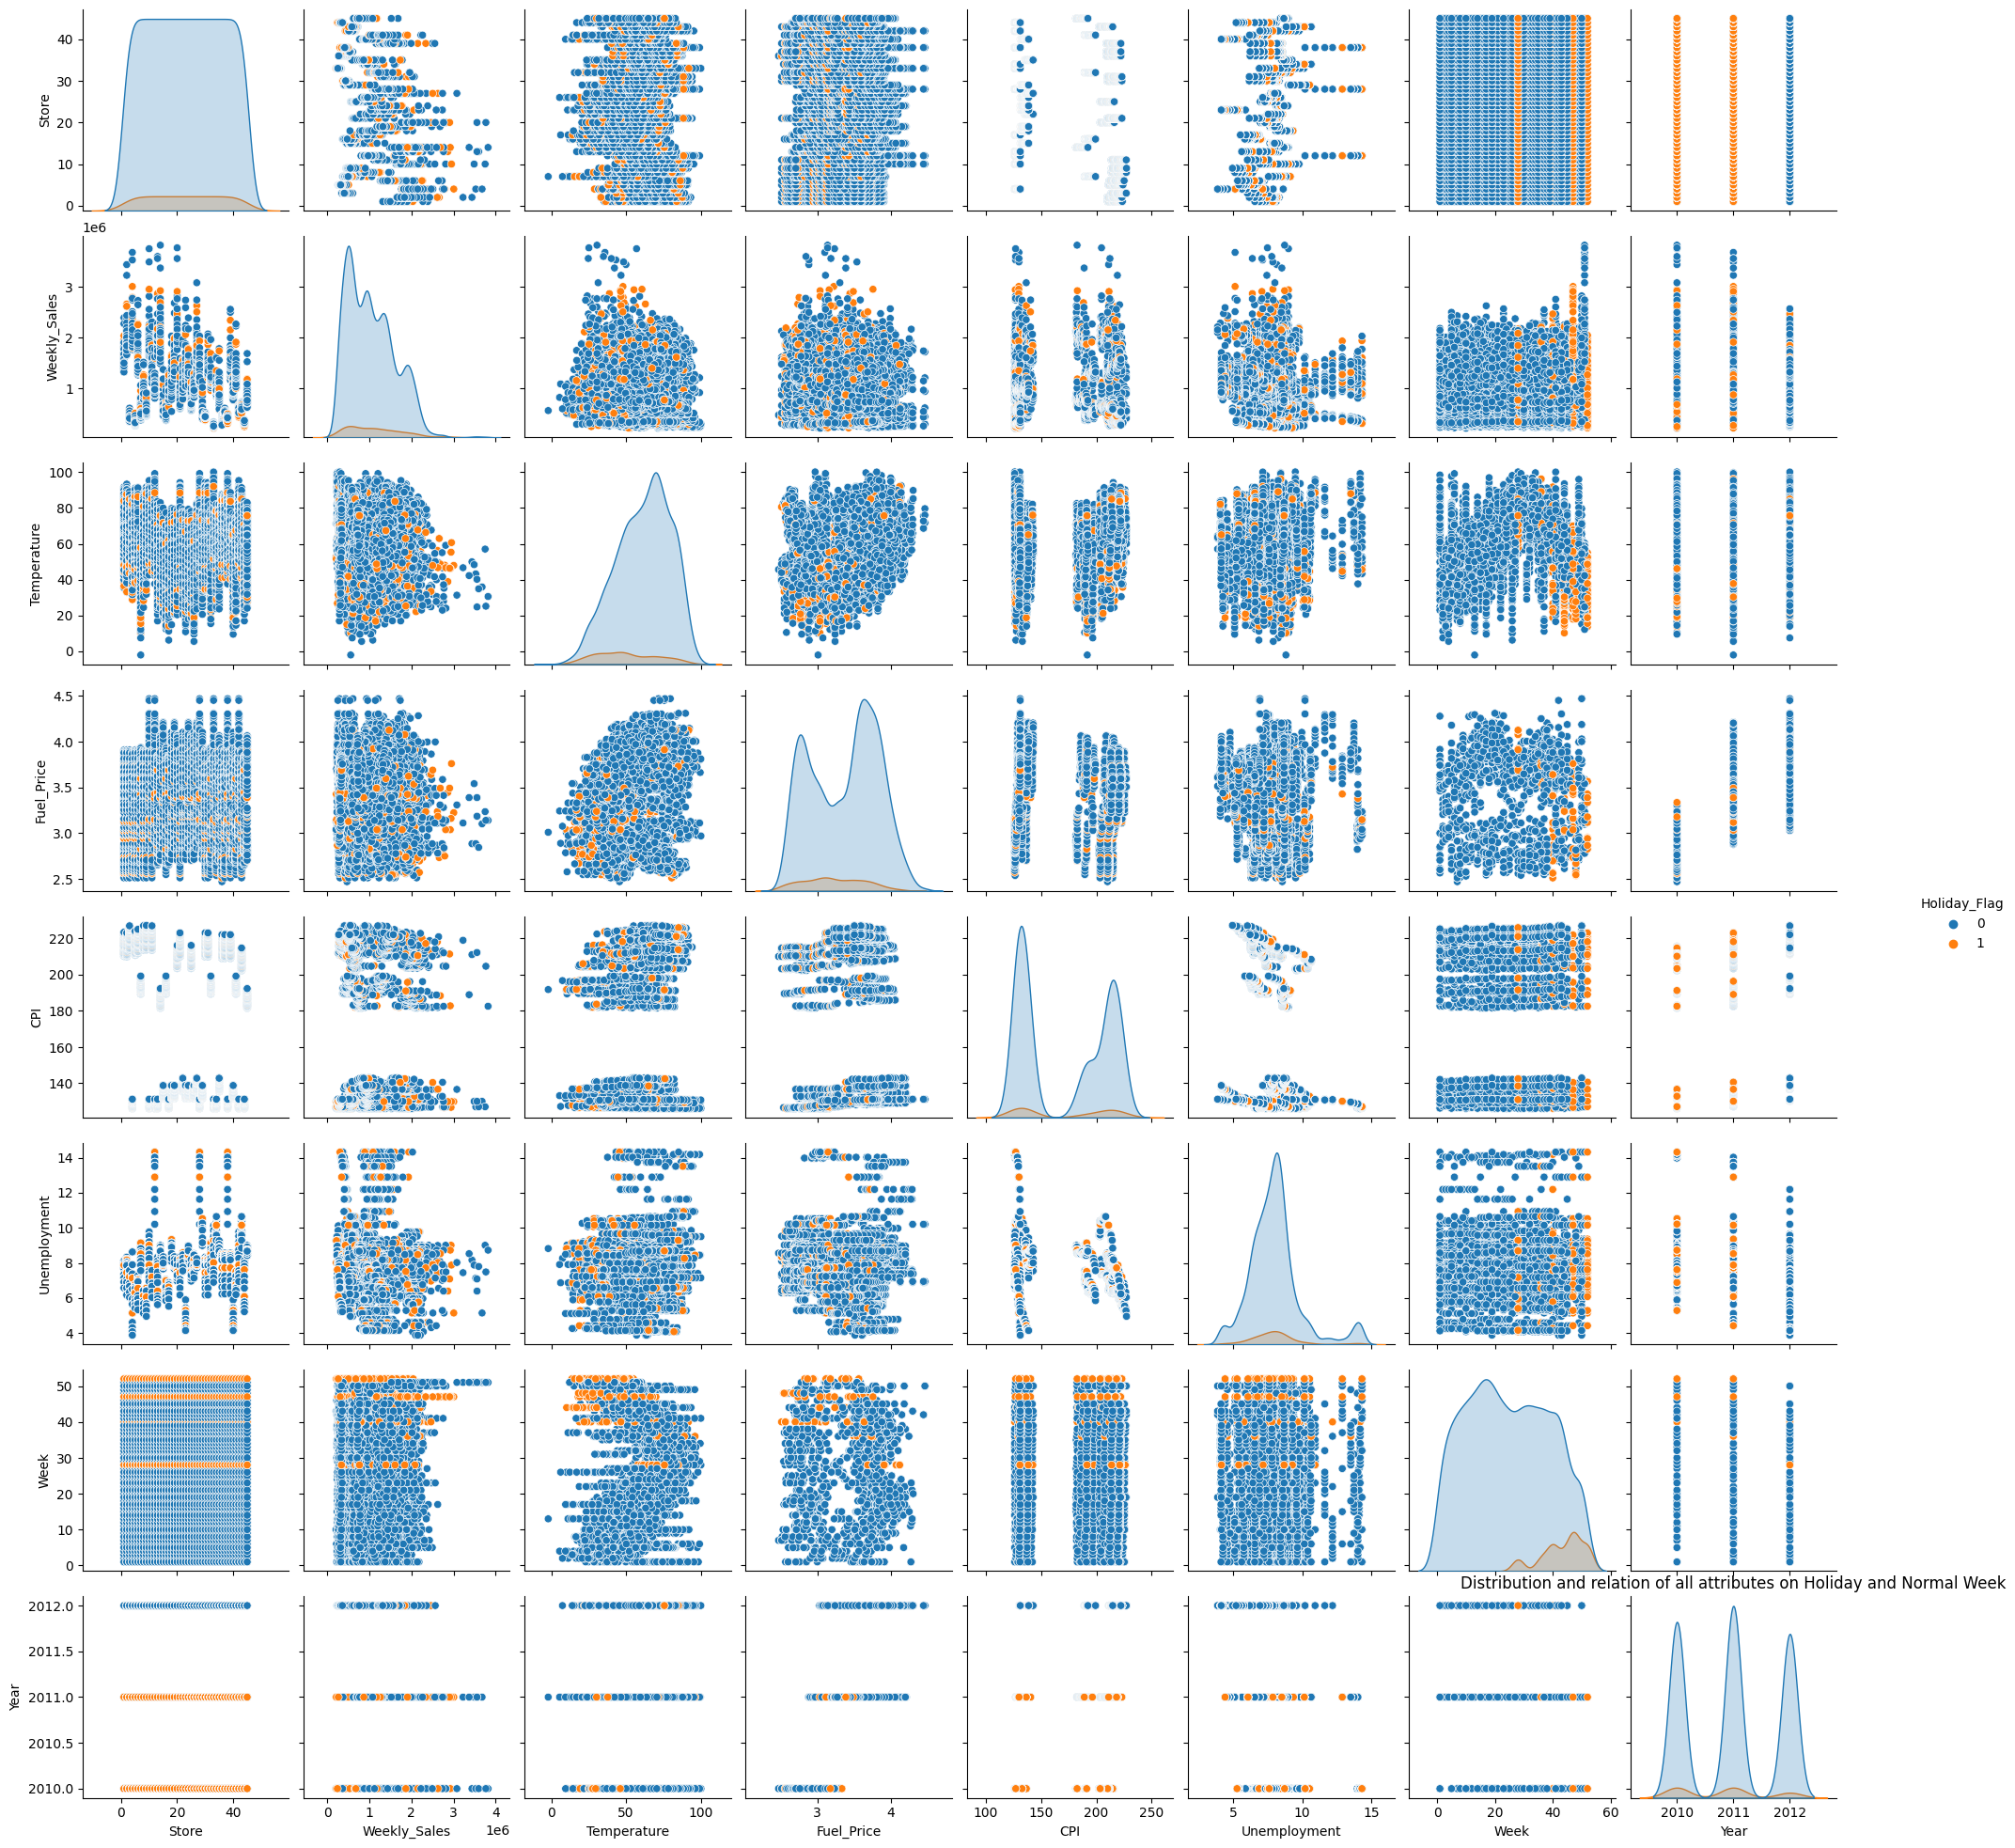

In [25]:
sns.pairplot(data2 , hue = "Holiday_Flag" );
plt.title("Distribution and relation of all attributes on Holiday and Normal Week");

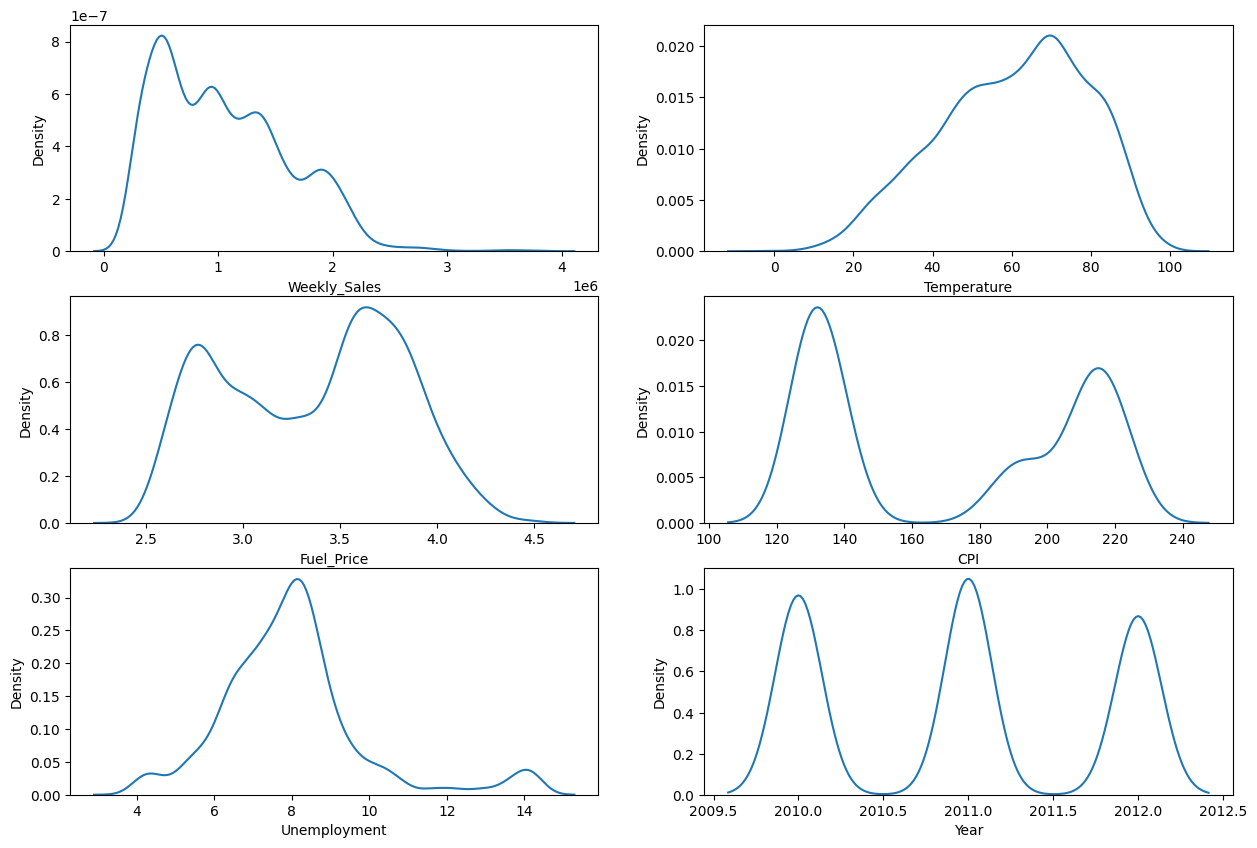

In [26]:
n = 1
plt.figure(figsize=(15,10))
for i in ['Weekly_Sales','Temperature', 'Fuel_Price','CPI', 'Unemployment','Year']:
        if n<=6:
            plt.subplot(3,2,n);
            n+=1
            sns.kdeplot(x = data2[i])
            plt.xlabel(i)

In [27]:
#Building my Model
x = data.drop(['Weekly_Sales'],axis=1)
y = data['Weekly_Sales']

In [28]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [31]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [32]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 272958140333.90073
MAE: 432835.64328595495
R2 : 15.27 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 16195530077.947886
MAE: 69549.25192307692
R2 : 94.97 %
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 24729049391.008408
MAE: 88452.85727272727
R2 : 92.32 %
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------
MSE: 219538664463.64618
MAE: 354720.61818492616
R2 : 31.85 %
-----------------
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
-----------------
MSE: 32176715929.551723
MAE: 133660.24395002017
R2 : 90.01 %
